<a href="https://colab.research.google.com/github/Daniel9905/cs194proj4/blob/main/CS194_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xml.etree.ElementTree as ET 
import numpy as np
import os 
from __future__ import print_function, division
import torch
import pandas as pd
from skimage import io
import skimage.transform as sktr
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
from skimage.color import rgb2gray
import glob
import cv2
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf

In [ ]:
if not os.path.exists('/content/ibug_300W_large_face_landmark_dataset'):
  !wget https://people.eecs.berkeley.edu/~zhecao/ibug_300W_large_face_landmark_dataset.zip
  !unzip 'ibug_300W_large_face_landmark_dataset.zip'    
  !rm -r 'ibug_300W_large_face_landmark_dataset.zip'
  
os.path.exists('/content/ibug_300W_large_face_landmark_dataset')

True

In [ ]:
tree = ET.parse('ibug_300W_large_face_landmark_dataset/labels_ibug_300W_train.xml')
root = tree.getroot()
root_dir = 'ibug_300W_large_face_landmark_dataset'

bboxes = [] # face bounding box used to crop the image
landmarks = [] # the facial keypoints/landmarks for the whole training dataset
img_filenames = [] # the image names for the whole dataset

for filename in root[2]:
	img_filenames.append(os.path.join(root_dir, filename.attrib['file']))
	box = filename[0].attrib
	# x, y for the top left corner of the box, w, h for box width and height
	bboxes.append([box['left'], box['top'], box['width'], box['height']]) 

	landmark = []
	for num in range(68):
		x_coordinate = int(filename[0][num].attrib['x'])
		y_coordinate = int(filename[0][num].attrib['y'])
		landmark.append([x_coordinate, y_coordinate])
	landmarks.append(landmark)

landmarks = np.array(landmarks).astype('float32')     
bboxes = np.array(bboxes).astype('float32') 

In [ ]:
img_filenames

['ibug_300W_large_face_landmark_dataset/lfpw/trainset/image_0457.png',
 'ibug_300W_large_face_landmark_dataset/helen/trainset/2659264056_1.jpg',
 'ibug_300W_large_face_landmark_dataset/helen/trainset/249852286_2.jpg',
 'ibug_300W_large_face_landmark_dataset/afw/281972218_1.jpg',
 'ibug_300W_large_face_landmark_dataset/helen/trainset/2948551782_1.jpg',
 'ibug_300W_large_face_landmark_dataset/helen/trainset/2418314368_1.jpg',
 'ibug_300W_large_face_landmark_dataset/afw/3662810723_1.jpg',
 'ibug_300W_large_face_landmark_dataset/helen/trainset/2437510272_1.jpg',
 'ibug_300W_large_face_landmark_dataset/helen/trainset/1312213009_1.jpg',
 'ibug_300W_large_face_landmark_dataset/helen/trainset/200506188_1.jpg',
 'ibug_300W_large_face_landmark_dataset/ibug/image_097_1.jpg',
 'ibug_300W_large_face_landmark_dataset/helen/trainset/2806176050_1.jpg',
 'ibug_300W_large_face_landmark_dataset/lfpw/trainset/image_0144.png',
 'ibug_300W_large_face_landmark_dataset/helen/testset/3226773050_1.jpg',
 'ibug_

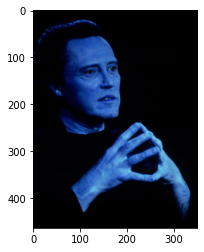

In [ ]:



# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
im =cv2.imread(img_filenames[0])
plt.imshow(im)